In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/Users/brandonmanley/Desktop/PhD/dijet_dsa')
import dsa_mc.dijet as dijet
import random
from IPython.display import display, Math

# setup plotting
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 12
plt.rcParams["legend.fontsize"] = 12
plt.rcParams["axes.labelsize"] = 14  
plt.rcParams["xtick.labelsize"] = 12  
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["axes.titlesize"] = 16 
plt.rcParams["text.usetex"] = True
plt.rcParams["text.latex.preamble"] = r"\usepackage{amsmath}"
%config InlineBackend.figure_format = 'retina'

In [23]:
dj = dijet.DIJET(3, constrained_moments=True)
dj.load_params('replica_params_pp.csv')
dj.set_params(3)

lumi = 100
roots = 100

kins = dijet.Kinematics()
kins.x = 0.01
kins.s = roots**2
kins.Q = 4
kins.delta = 0.2
kins.y = (kins.Q**2)/(kins.s*kins.x)
kins.z = 0.4
kins.phi_Dp = 0
kins.phi_kp = 0

assert kins.y < 1, f'y = {kins.y} > 1'
print('oscill. factor', kins.Q*np.sqrt(kins.z*(1-kins.z)))

data = {}
for weight in ['den', 'den phi', '1', 'cos(phi_Dp)', 'cos(phi_kp)cos(phi_Dp)', 'sin(phi_kp)sin(phi_Dp)']:
    data[weight] = []


pT_values = np.linspace(0.5, 10, 50)
for pT in pT_values:

    kins.pT = pT

    den = dj.angle_integrated_denominator(kins, weight='1')
    den_phi = dj.angle_integrated_denominator(kins, weight='cos(phi_Dp)')
    data['den'].append(den)
    data['den phi'].append(den_phi)

    for weight in ['1', 'cos(phi_Dp)', 'cos(phi_kp)cos(phi_Dp)', 'sin(phi_kp)sin(phi_Dp)']:
        num = dj.angle_integrated_numerator(kins, weight=weight)
        data[weight].append(num)
        

for weight in data:
    data[weight] = np.array(data[weight])

Using constrained moment parameters
loaded N(r^2, s) data from narr_ymin4.61_ymax14.91_AAMS09.dat
loaded polarized amp data from /Users/brandonmanley/Desktop/PhD/dijet_dsa/dsa_mc/dipoles/d05-rc/
loaded params from replica_params_dis.csv
loaded random moment params from /dipoles/moment_params_dis.csv
loaded replica 3
loaded params from replica_params_pp.csv
loaded random moment params from /dipoles/moment_params_pp.csv
loaded replica 3
oscill. factor 1.9595917942265424


In [25]:
# calc asymmetries

data['all'] = data['1']/data['den']

data['all phi'] = data['1']/data['den phi']

data['cos corr'] = data['cos(phi_Dp)']/data['den']
data['coscos corr'] = data['cos(phi_kp)cos(phi_Dp)']/data['den']
data['sinsin corr'] = data['sin(phi_kp)sin(phi_Dp)']/data['den']

data['cos corr phi'] = data['cos(phi_Dp)']/data['den phi']
data['coscos corr phi'] = data['cos(phi_kp)cos(phi_Dp)']/data['den phi']
data['sinsin corr phi'] = data['sin(phi_kp)sin(phi_Dp)']/data['den phi']

data['all error'] = np.sqrt(1/(data['den']*lumi))
data['cos error'] = np.sqrt(0.5/(data['den']*lumi))
data['coscos error'] = np.sqrt(0.25/(data['den']*lumi))
data['sinsin error'] = np.sqrt(0.25/(data['den']*lumi))



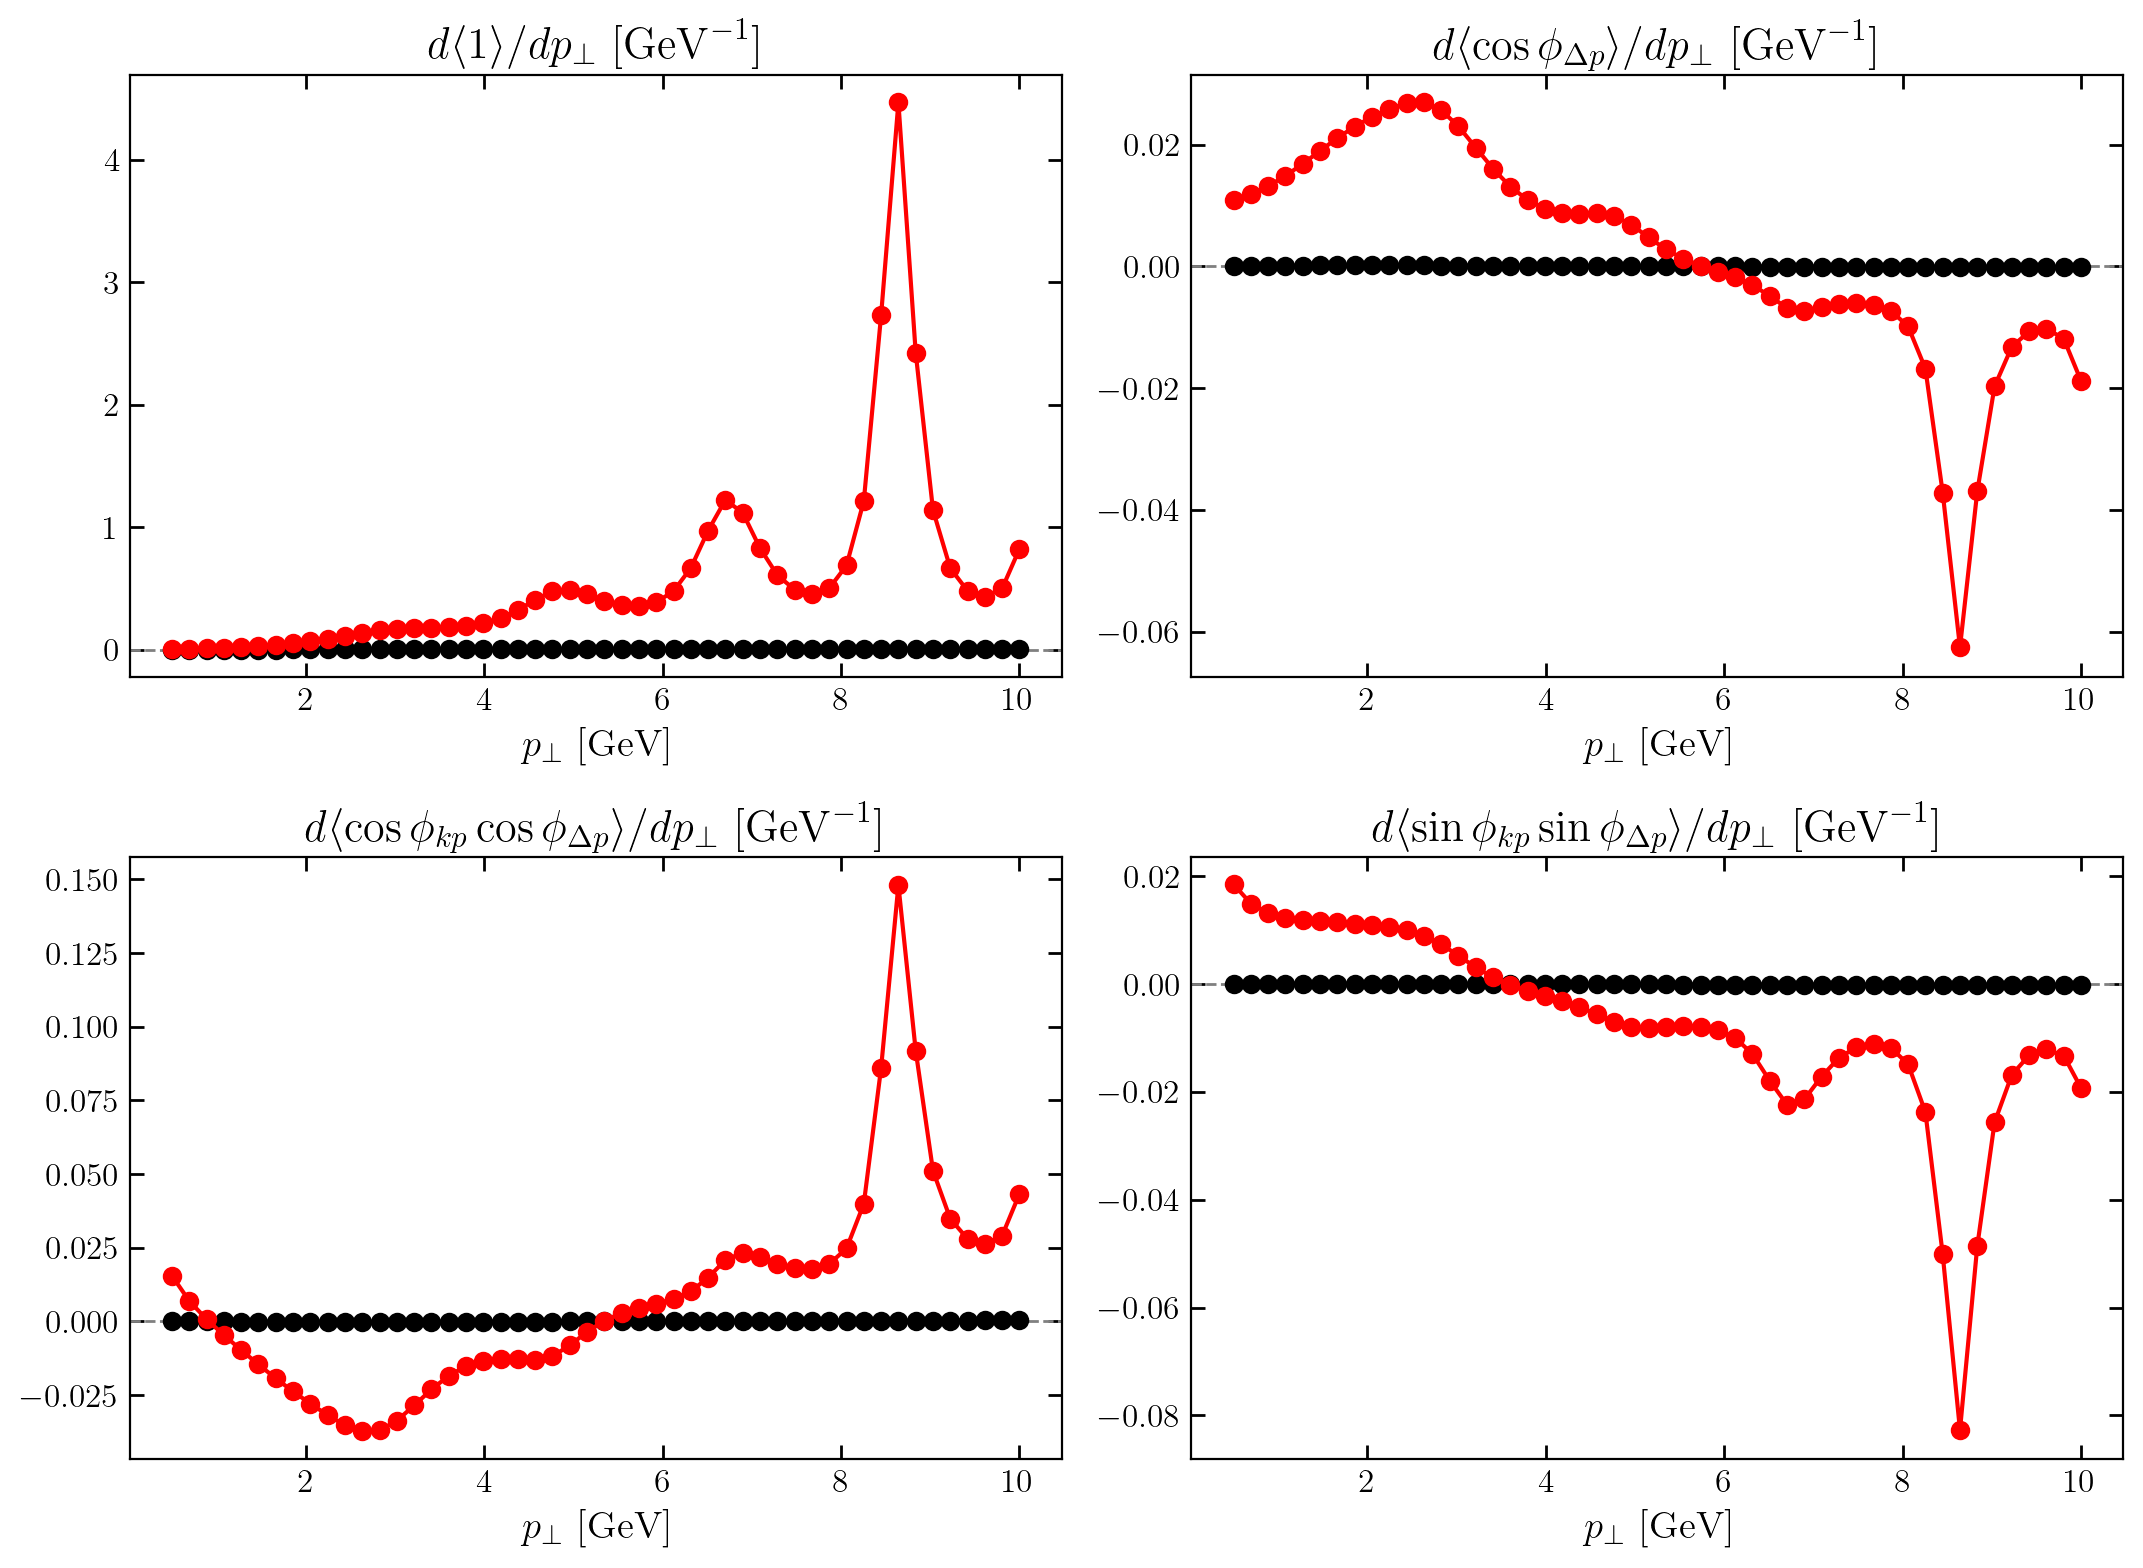

In [27]:
# plot spectra

asp_ratio = 4/3
psize = 4
fig, axs = plt.subplots(2, 2, figsize=(asp_ratio*psize*2, psize*2))

axs[0,0].errorbar(
    pT_values, data['all'], yerr=data['all error'], marker='o',
    capsize=3, elinewidth=0.8, capthick=0.5, 
    color='black'
)
axs[0,1].errorbar(
    pT_values, data['cos corr'], yerr=data['cos error'], marker='o',
    capsize=3, elinewidth=0.8, capthick=0.5, 
    color='black'
)
axs[1,0].errorbar(
    pT_values, data['coscos corr'], yerr=data['coscos error'], marker='o',
    capsize=3, elinewidth=0.8, capthick=0.5, 
    color='black'
)
axs[1,1].errorbar(
    pT_values, data['sinsin corr'], yerr=data['sinsin error'], marker='o',
    capsize=3, elinewidth=0.8, capthick=0.5, 
    color='black'
)


axs[0,0].errorbar(
    pT_values, data['all phi'], yerr=data['all error'], marker='o',
    capsize=3, elinewidth=0.8, capthick=0.5, 
    color='red'
)
axs[0,1].errorbar(
    pT_values, data['cos corr phi'], yerr=data['cos error'], marker='o',
    capsize=3, elinewidth=0.8, capthick=0.5, 
    color='red'
)
axs[1,0].errorbar(
    pT_values, data['coscos corr phi'], yerr=data['coscos error'], marker='o',
    capsize=3, elinewidth=0.8, capthick=0.5, 
    color='red'
)
axs[1,1].errorbar(
    pT_values, data['sinsin corr phi'], yerr=data['sinsin error'], marker='o',
    capsize=3, elinewidth=0.8, capthick=0.5, 
    color='red'
)


for ax in axs:
    for iax in ax:
        iax.tick_params(axis="both", direction="in", length=5, width=1, which='both', right=True, top=True)
        iax.set_xlabel(r'$p_{\perp}$ [GeV]')
        iax.tick_params(axis="both", direction="in", length=5, width=1, which='both', right=True, top=True)
        iax.axhline(y=0, color='gray', linestyle='--', linewidth=1)


axs[0,0].set_title(fr'$d \langle 1 \rangle /d p_\perp \,\,[\mathrm{{GeV}}^{{-1}}]$')
axs[0,1].set_title(fr'$d \langle \cos \phi_{{\Delta p}} \rangle /d p_\perp \,\,[\mathrm{{GeV}}^{{-1}}]$')
axs[1,0].set_title(fr'$d \langle \cos \phi_{{k p}} \cos \phi_{{\Delta p}}  \rangle /d p_\perp \,\,[\mathrm{{GeV}}^{{-1}}]$')
axs[1,1].set_title(fr'$d \langle \sin \phi_{{k p}} \sin \phi_{{\Delta p}}  \rangle /d p_\perp \,\,[\mathrm{{GeV}}^{{-1}}]$')

# axs[0,1].set_ylim([-0.000005, 0.000005])


# axs[0,0].legend()
# axs[0,0].semilogy()
# axs[0,0].set_ylim([-0.000005, 0.000005])

plt.tight_layout()
plt.show()

# if plot_bands:
#     fig.savefig('plots/dsa_band.pdf', dpi=400, bbox_inches="tight")
# else:
#     fig.savefig('plots/dsa_lines.pdf', dpi=400, bbox_inches="tight")



In [101]:
# make data for dsa contour plot
dj = dijet.DIJET(3, constrained_moments=True)
dj.load_params('replica_params_pp.csv')
dj.set_params(3)

y_values = np.linspace(0.05, 0.95, 100)
Q2_values = np.linspace(1, 100, 100)

grid_kins = dijet.Kinematics(z=0.4, delta=0.2, pT=3.0, s=100**2)

y_grid = np.zeros((100, 100))
Q2_grid = np.zeros((100, 100))

lumi = 100

grid_values = {}
weights = ['1', 'cos(phi_Dp)', 'cos(phi_kp)cos(phi_Dp)', 'sin(phi_kp)sin(phi_Dp)']
for weight in weights: grid_values[weight] = np.zeros((100, 100))

for i, y in enumerate(y_values):
    for j, Q2 in enumerate(Q2_values):

        y_grid[i,j] = y
        Q2_grid[i,j] = Q2

        grid_kins.y = y
        grid_kins.Q = np.sqrt(Q2)

        grid_kins.x = (Q2)/(grid_kins.s*y)
        if grid_kins.x < 0.01 and np.sqrt(Q2*grid_kins.z*(1-grid_kins.z)) > 1.7:
        
            den = dj.angle_integrated_denominator(grid_kins)
            err = 1/np.sqrt(den*lumi)
        
            for weight in ['1', 'cos(phi_Dp)', 'cos(phi_kp)cos(phi_Dp)', 'sin(phi_kp)sin(phi_Dp)']:
                
                num = dj.angle_integrated_numerator(grid_kins, weight=weight)
                dsa = num/den

                if 'k' in weight: corr_err = np.sqrt(0.25)*err
                elif 'cos' in weight: corr_err = np.sqrt(0.5)*err
                else: corr_err = err

                grid_values[weight][i, j] = corr_err/np.abs(dsa)



    

Using constrained moment parameters
loaded N(r^2, s) data from narr_ymin4.61_ymax14.91_AAMS09.dat
loaded polarized amp data from /Users/brandonmanley/Desktop/PhD/dijet_dsa/dsa_mc/dipoles/d05-rc/
loaded params from replica_params_dis.csv
loaded random moment params from /dipoles/moment_params_dis.csv
loaded replica 3
loaded params from replica_params_pp.csv
loaded random moment params from /dipoles/moment_params_pp.csv
loaded replica 3


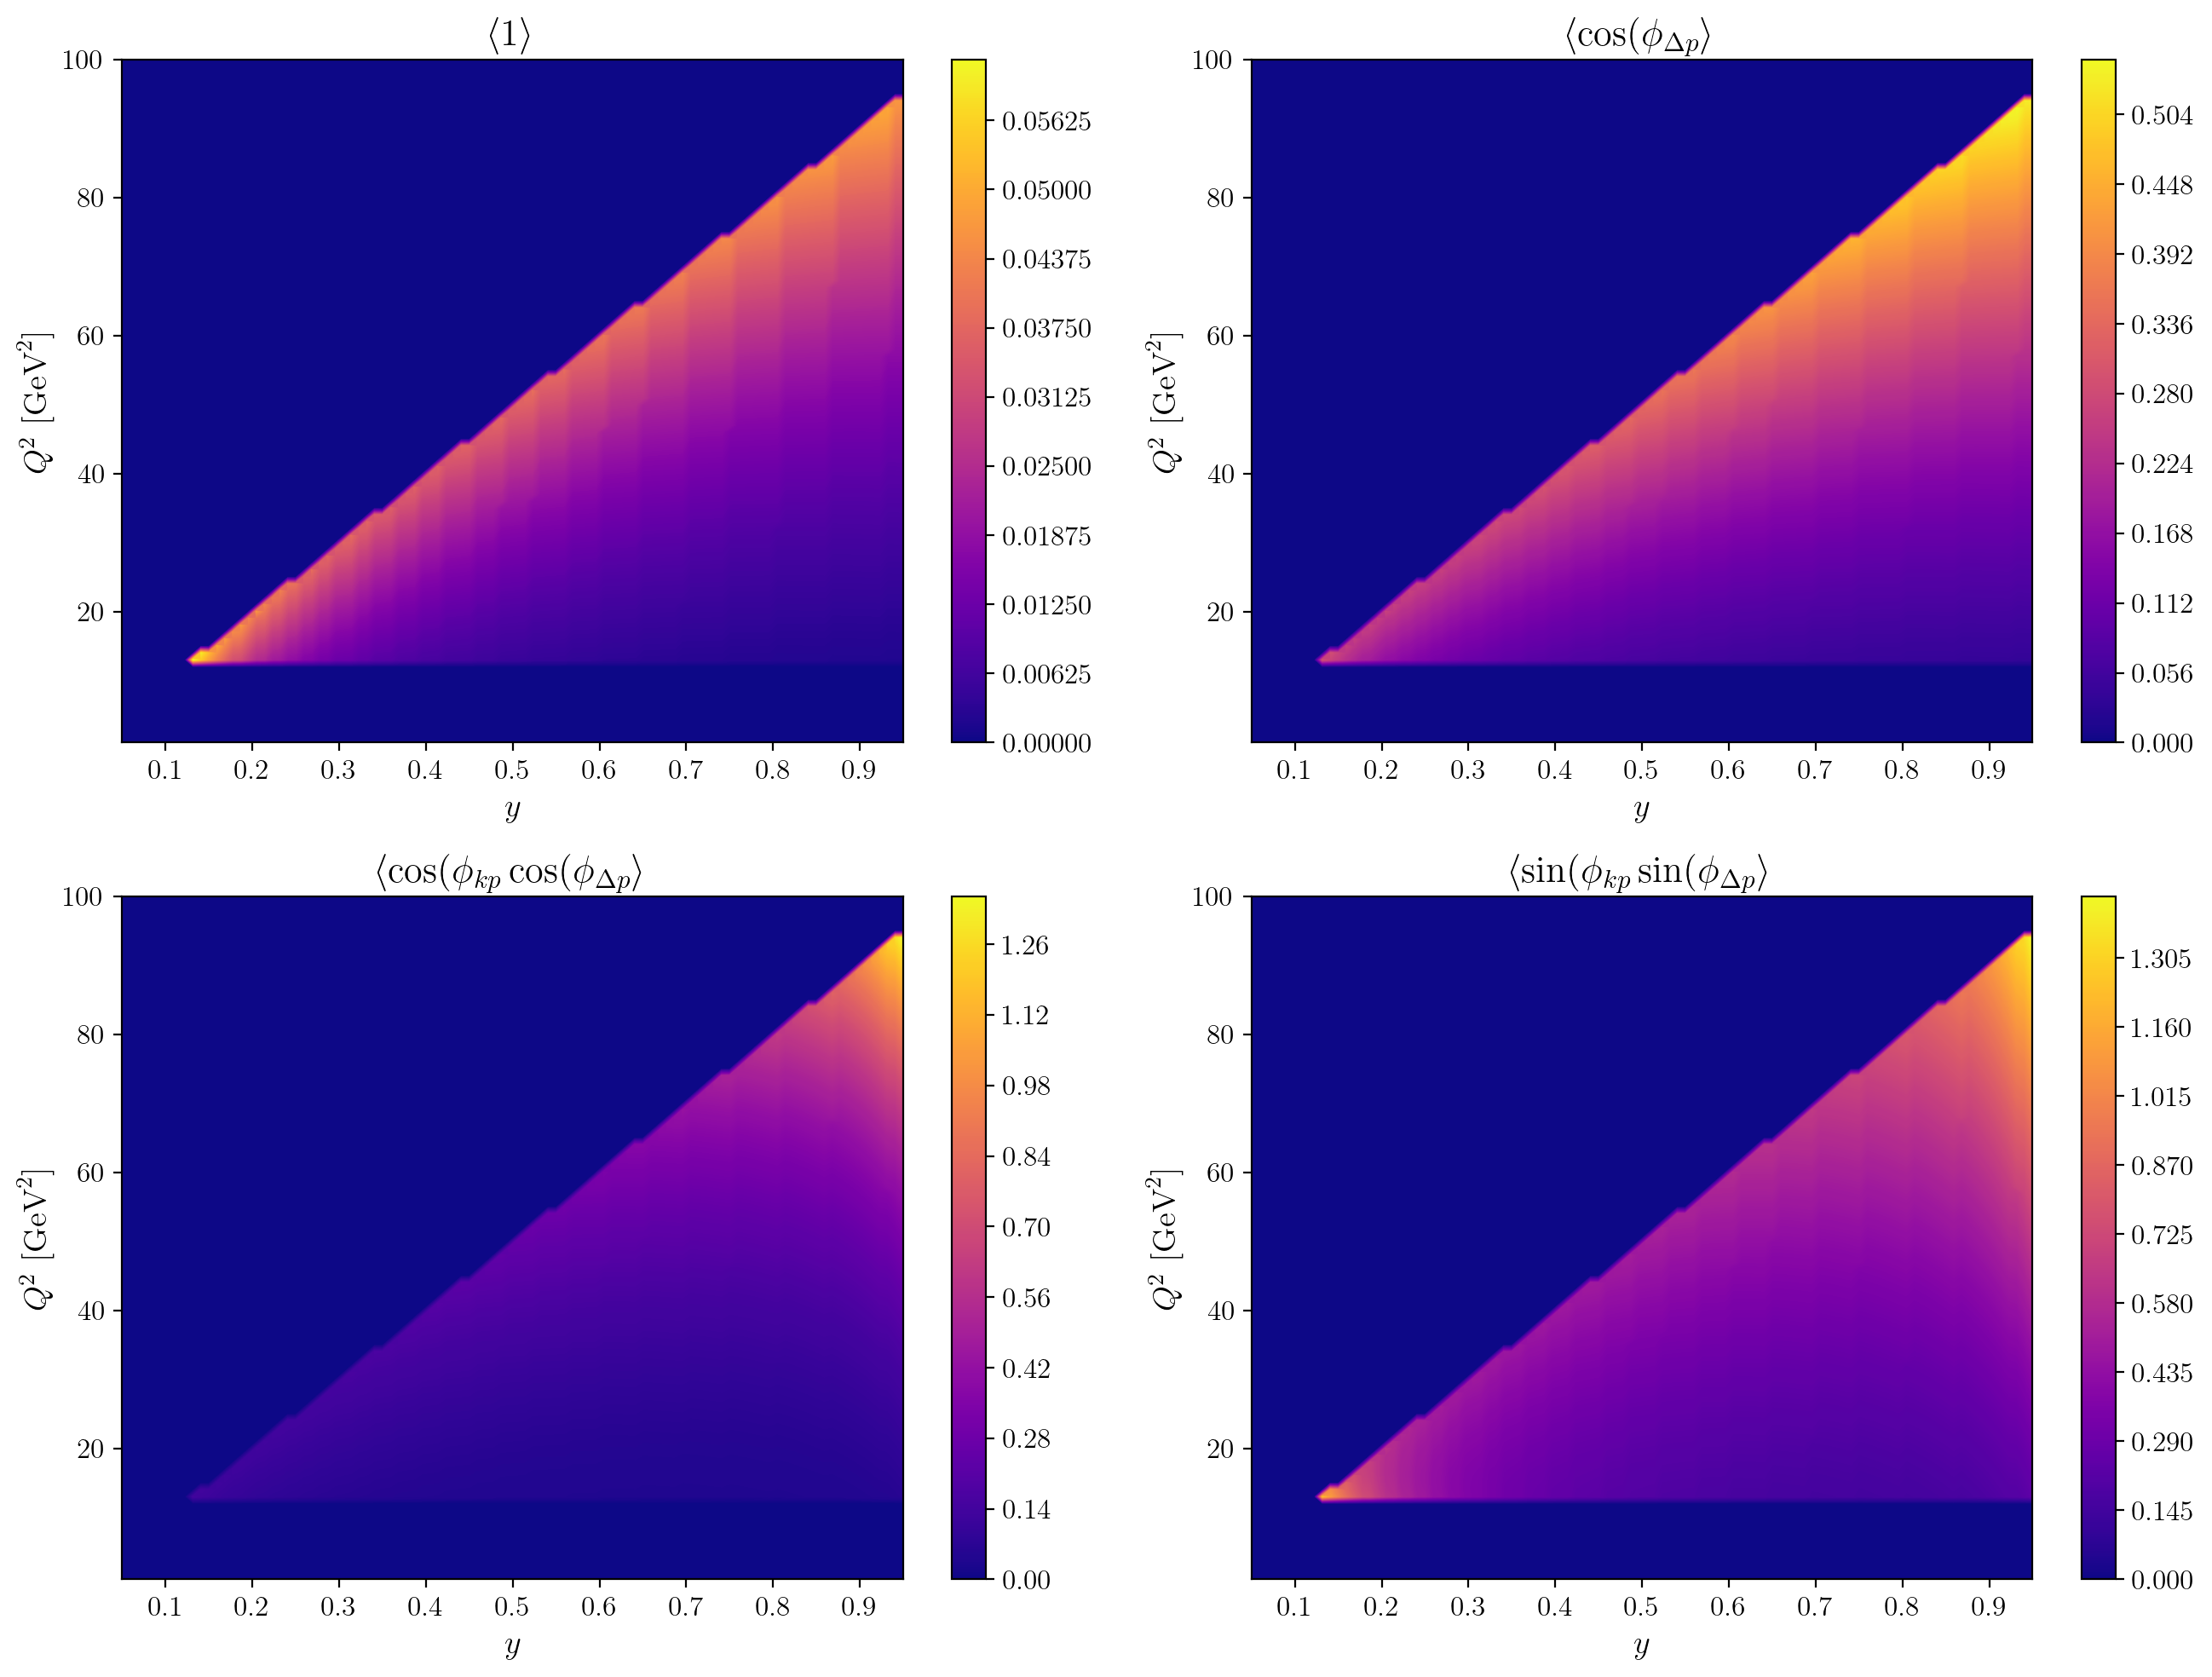

In [102]:
# make dsa contour plots
asp_ratio = 4/3
psize = 5
fig, ax = plt.subplots(2, 2, figsize=(asp_ratio*psize*2, psize*2))

axs = [[0,0], [0,1], [1,0], [1,1]]
for i, weight in enumerate(weights):

    contour = ax[*axs[i]].contourf(y_grid, Q2_grid, grid_values[weight], levels=300, cmap='plasma')  # More levels = smoother
    cbar = fig.colorbar(contour, ax=ax[*axs[i]])
    ax[*axs[i]].set_xlabel(r'$y$')
    ax[*axs[i]].set_ylabel(r'$Q^2 \,\,[\mathrm{GeV}^2]$')


ax[0,0].set_title(r'$\langle 1 \rangle$')
ax[0,1].set_title(r'$\langle \cos(\phi_{\Delta p} \rangle$')
ax[1,0].set_title(r'$\langle \cos(\phi_{k p} \cos(\phi_{\Delta p} \rangle$')
ax[1,1].set_title(r'$\langle \sin(\phi_{k p} \sin(\phi_{\Delta p} \rangle$')

# fig.savefig('fb_oscillation_map.png', dpi=700)

plt.tight_layout()
plt.show()